In [ ]:
import pandas as pd
import numpy as np
import sys
import gdown
import matplotlib.pyplot as plt
from google.colab import drive
# We took dataset from this website
#https://data.mendeley.com/datasets/3j443ntrkr/1

file_url = 'https://drive.google.com/uc?id=1-xH4mNMz9Qq1_eW0wBsrm375s3Q8Kb87'
output_path = 'JaipurClimate.csv'

gdown.download(file_url, output_path, quiet=False)
data = pd.read_csv(output_path)

Downloading...
From: https://drive.google.com/uc?id=1-xH4mNMz9Qq1_eW0wBsrm375s3Q8Kb87
To: /content/JaipurClimate.csv
100%|██████████| 26.2k/26.2k [00:00<00:00, 38.4MB/s]


In [ ]:
# preview
print("Preview of data:")
print(data.head())

Preview of data:
   Dew point  Cloud cover  Precipitation  Temperature  Wind direction  \
0      384.0    609.00000       10.72491    1400.9999       10244.001   
1      388.0   1661.00000       10.72491    2420.0000        8635.001   
2     1262.0   2369.00000       10.72491    3001.0000       17787.000   
3      415.0   3226.00000       10.72491    2953.0000       45755.000   
4     1130.0    167.00002       10.72491    2829.0000       24785.000   

   Wind speed  
0   673.99994  
1  1792.00000  
2  1448.00000  
3  1632.00000  
4  1330.00000  


In [ ]:
print(data.shape)

(575, 6)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[['Dew point', 'Cloud cover', 'Temperature','Wind direction','Wind speed']]   # independent features
y = data['Precipitation']                                                             # target variable

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#  Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error

# Linear regression (baseline)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)


# Kernel Ridge (nonlinear model)
kr = KernelRidge(kernel='rbf', alpha=1.0, gamma=0.1)
kr.fit(X_train_scaled, y_train)
y_pred_kr = kr.predict(X_test_scaled)
mse_kr = mean_squared_error(y_test, y_pred_kr)


# Compare errors
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_kr = mean_squared_error(y_test, y_pred_kr)

print(f"Linear Regression MSE: {mse_lr:.4f}")
print(f"Kernel Ridge Regression MSE: {mse_kr:.4f}")

Linear Regression MSE: 790.4627
Kernel Ridge Regression MSE: 733.4746


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
param_grid = {
    "alpha": [0.001,0.01, 0.1, 1, 10],
    "gamma": [0.001, 0.01, 0.1, 1, 10],
    "kernel": ["rbf"]
}

grid = GridSearchCV(KernelRidge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)


mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Tuned Kernel Ridge Regression MSE: {mse_best:.4f}")

Best Parameters: {'alpha': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
Tuned Kernel Ridge Regression MSE: 673.0053


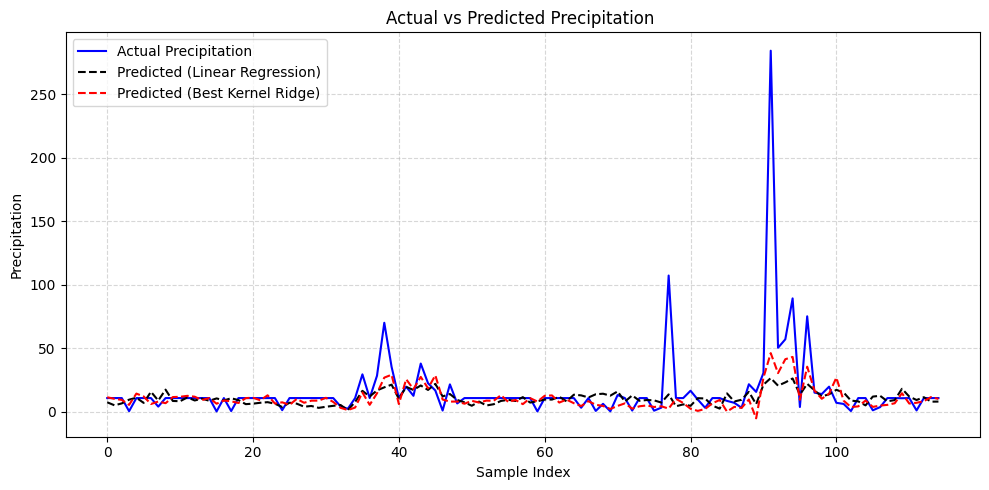


=== Final Comparison ===
Linear Regression MSE: 790.4627
Tuned Kernel Ridge Regression MSE: 673.0053

 Kernel Trick improved performance — nonlinear model fits better


In [ ]:

# Visualization: Actual vs Predicted Comparison

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Precipitation', color='blue')
plt.plot(y_pred_lr, label='Predicted (Linear Regression)', color='black', linestyle='--')
plt.plot(y_pred_best, label='Predicted (Best Kernel Ridge)', color='red', linestyle='--')

plt.title('Actual vs Predicted Precipitation ')
plt.xlabel('Sample Index')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Model Performance Comparison
print("\n=== Final Comparison ===")
print(f"Linear Regression MSE: {mse_lr:.4f}")
print(f"Tuned Kernel Ridge Regression MSE: {mse_best:.4f}")

if mse_best < mse_lr:
    print("\n Kernel Trick improved performance — nonlinear model fits better")
else:
    print("\n Kernel Trick did not improve much — data may be nearly linear")


Downloading...
From: https://drive.google.com/uc?id=1-xH4mNMz9Qq1_eW0wBsrm375s3Q8Kb87
To: /content/JaipurClimate.csv
100%|██████████| 26.2k/26.2k [00:00<00:00, 9.33MB/s]


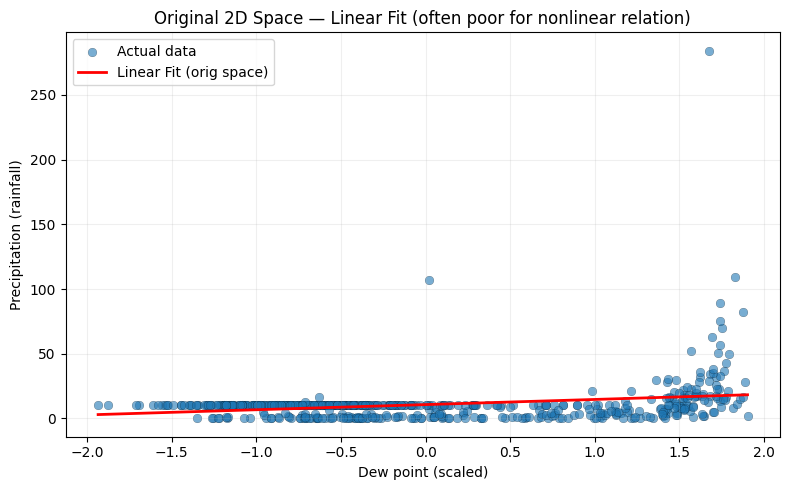

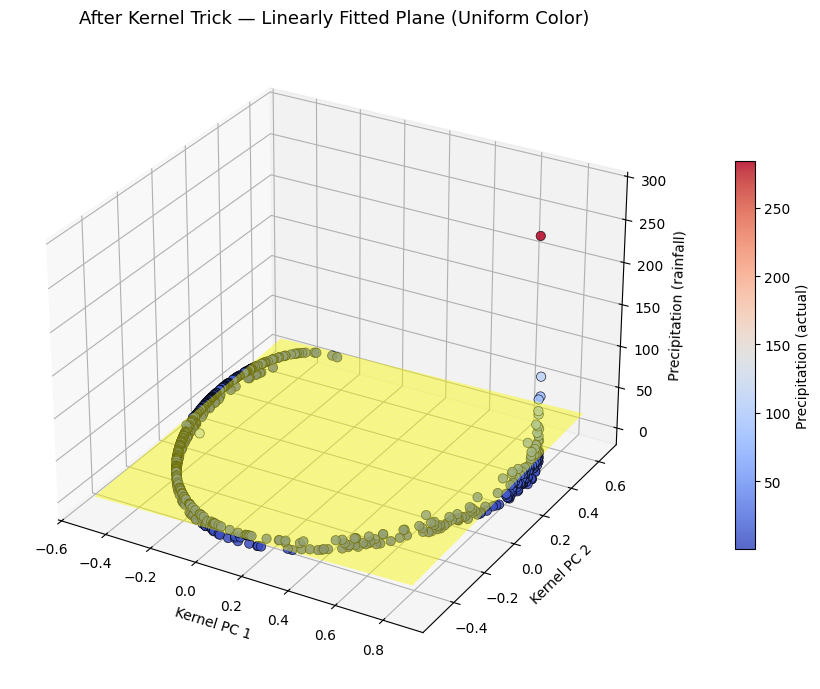

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
plt.style.use('default')

import gdown

file_url = 'https://drive.google.com/uc?id=1-xH4mNMz9Qq1_eW0wBsrm375s3Q8Kb87'
output_path = 'JaipurClimate.csv'

gdown.download(file_url, output_path, quiet=False)

# Define variables for visualization
kpca_components = 3
gamma = 0.5
plane_alpha = 0.45
plane_color = 'yellow'
# ----------------------------

# Load dataset
data = pd.read_csv(output_path)

# Choosing feature
if 'Dew point' in data.columns:
    feature_name = 'Dew point'
elif 'Wind speed' in data.columns:
    feature_name = 'Wind speed'
else:
    raise ValueError("Dataset must contain 'Dew point' or 'Wind speed' column.")

X = data[[feature_name]].copy()
y = data['Precipitation'].values

# Drop NaNs
mask = ~np.isnan(X.values).ravel() & ~np.isnan(y)
X = X.iloc[mask].reset_index(drop=True)
y = y[mask]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Linear regression in original space
lr = LinearRegression()
lr.fit(X_scaled, y)
y_pred_lr = lr.predict(X_scaled)

plt.figure(figsize=(8,5))
plt.scatter(X_scaled.ravel(), y, alpha=0.6, label="Actual data", s=40, edgecolor="k", linewidth=0.2)
sort_idx = np.argsort(X_scaled.ravel())
plt.plot(X_scaled.ravel()[sort_idx], y_pred_lr[sort_idx], color="red", linewidth=2, label="Linear Fit (orig space)")
plt.xlabel(f"{feature_name} (scaled)")
plt.ylabel("Precipitation (rainfall)")
plt.title("Original 2D Space — Linear Fit (often poor for nonlinear relation)")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# Kernel PCA (RBF kernel trick)
kpca = KernelPCA(n_components=kpca_components, kernel='rbf', gamma=gamma, fit_inverse_transform=False, random_state=42)
X_kpca = kpca.fit_transform(X_scaled)

# Linear regression in kernel space (using first two PCs)
lr_k = LinearRegression()
X_kpca_2 = X_kpca[:, :2]
lr_k.fit(X_kpca_2, y)

# Predict over grid for plane
u = np.linspace(X_kpca_2[:,0].min(), X_kpca_2[:,0].max(), 40)
v = np.linspace(X_kpca_2[:,1].min(), X_kpca_2[:,1].max(), 40)
U, V = np.meshgrid(u, v)
UV = np.column_stack([U.ravel(), V.ravel()])
Z_pred = lr_k.predict(UV).reshape(U.shape)

# 3D Visualization
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

# Scatter actual points
p = ax.scatter(
    X_kpca_2[:,0], X_kpca_2[:,1], y,
    c=y, cmap="coolwarm", alpha=0.85, s=45, edgecolor="k", linewidth=0.5
)

# Plot uniform-colored fitted plane
ax.plot_surface(U, V, Z_pred, alpha=plane_alpha, color=plane_color, rstride=1, cstride=1, linewidth=0.1, antialiased=True)

# Labels and styling
ax.set_xlabel("Kernel PC 1")
ax.set_ylabel("Kernel PC 2")
ax.set_zlabel("Precipitation (rainfall)")
ax.set_title("After Kernel Trick — Linearly Fitted Plane (Uniform Color)", fontsize=13)
fig.colorbar(p, label="Precipitation (actual)", shrink=0.6, pad=0.08)

# Aesthetics
ax.view_init(elev=28, azim=-60)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
#comparing multiple regression models
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Linear Regression (Baseline)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"  MSE: {mse_lr:.4f}")
print(f"  R² : {r2_lr:.4f}")
print("-" * 50)


# Kernel Ridge (RBF kernel trick)
param_grid_rbf = {
    "alpha": [0.001, 0.01, 0.1, 1, 10],
    "gamma": [0.001, 0.01, 0.1, 1, 10],
    "kernel": ["rbf"]
}

grid_rbf = GridSearchCV(KernelRidge(), param_grid_rbf, cv=5, scoring='neg_mean_squared_error')
grid_rbf.fit(X_train_scaled, y_train)

best_rbf = grid_rbf.best_estimator_
y_pred_rbf = best_rbf.predict(X_test_scaled)

mse_rbf = mean_squared_error(y_test, y_pred_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)

print("Kernel Ridge Regression (RBF) Results:")
print("  Best Parameters:", grid_rbf.best_params_)
print(f"  MSE: {mse_rbf:.4f}")
print(f"  R² : {r2_rbf:.4f}")
print("-" * 50)


# Kernel Ridge (Polynomial kernel trick)
param_grid_poly = {
    "alpha": [0.001, 0.01, 0.1, 1, 10],
    "degree": [2, 3, 4, 5],
    "kernel": ["polynomial"]
}

grid_poly = GridSearchCV(KernelRidge(), param_grid_poly, cv=5, scoring='neg_mean_squared_error')
grid_poly.fit(X_train_scaled, y_train)

best_poly = grid_poly.best_estimator_
y_pred_poly = best_poly.predict(X_test_scaled)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Kernel Ridge Regression (Polynomial) Results:")
print("  Best Parameters:", grid_poly.best_params_)
print(f"  MSE: {mse_poly:.4f}")
print(f"  R² : {r2_poly:.4f}")
print("-" * 50)


# Kernel Ridge (Sigmoid kernel trick)
param_grid_sigmoid = {
    "alpha": [20, 10, 5, 2, 1],
    "gamma": [0.001, 0.01, 0.1, 1],
    "coef0": [0.0, 0.1, 0.5, 1],
    "kernel": ["sigmoid"]
}

grid_sigmoid = GridSearchCV(KernelRidge(), param_grid_sigmoid, cv=5, scoring='neg_mean_squared_error')
grid_sigmoid.fit(X_train_scaled, y_train)

best_sigmoid = grid_sigmoid.best_estimator_
y_pred_sigmoid = best_sigmoid.predict(X_test_scaled)

mse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid)
r2_sigmoid = r2_score(y_test, y_pred_sigmoid)

print("Kernel Ridge Regression (Sigmoid) Results:")
print("  Best Parameters:", grid_sigmoid.best_params_)
print(f"  MSE: {mse_sigmoid:.4f}")
print(f"  R² : {r2_sigmoid:.4f}")
print("-" * 50)


#Support Vector Regression
param_grid_svr = {
    "C": [0.1, 1, 10, 100],
    "epsilon": [0.01, 0.1, 0.5],
    "gamma": ["scale", 0.001, 0.01, 0.1, 1],
    "kernel": ["rbf", "poly", "sigmoid"]
}

grid_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_svr.fit(X_train_scaled, y_train)

best_svr = grid_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression (SVR) Results:")
print("  Best Parameters:", grid_svr.best_params_)
print(f"  MSE: {mse_svr:.4f}")
print(f"  R² : {r2_svr:.4f}")
print("-" * 50)


#Random Forest Regression
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train_scaled, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print("  Best Parameters:", grid_rf.best_params_)
print(f"  MSE: {mse_rf:.4f}")
print(f"  R² : {r2_rf:.4f}")
print("-" * 50)

Linear Regression Results:
  MSE: 790.4627
  R² : 0.1191
--------------------------------------------------
Kernel Ridge Regression (RBF) Results:
  Best Parameters: {'alpha': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
  MSE: 673.0053
  R² : 0.2500
--------------------------------------------------
Kernel Ridge Regression (Polynomial) Results:
  Best Parameters: {'alpha': 10, 'degree': 3, 'kernel': 'polynomial'}
  MSE: 643.8240
  R² : 0.2825
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254:

Kernel Ridge Regression (Sigmoid) Results:
  Best Parameters: {'alpha': 1, 'coef0': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}
  MSE: 835.6431
  R² : 0.0687
--------------------------------------------------
Support Vector Regression (SVR) Results:
  Best Parameters: {'C': 100, 'epsilon': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
  MSE: 776.4560
  R² : 0.1347
--------------------------------------------------
Random Forest Regression Results:
  Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
  MSE: 672.0943
  R² : 0.2510
--------------------------------------------------
